# <center> Image Segmentation
Reference: https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-camvid.ipynb

In [1]:
from fastai.vision import *

# Dowload dataset

In [2]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

[PosixPath('/Users/javi/.fastai/data/camvid_tiny/images'),
 PosixPath('/Users/javi/.fastai/data/camvid_tiny/labels'),
 PosixPath('/Users/javi/.fastai/data/camvid_tiny/codes.txt')]

In [3]:
path_lbl = path/'labels'
path_img = path/'images'

# X: Image

In [4]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/Users/javi/.fastai/data/camvid_tiny/images/0006R0_f02550.png'),
 PosixPath('/Users/javi/.fastai/data/camvid_tiny/images/0016E5_08137.png'),
 PosixPath('/Users/javi/.fastai/data/camvid_tiny/images/0001TP_006840.png')]

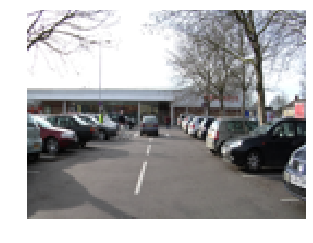

In [5]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

# Y: Image piexel labels

In [6]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/Users/javi/.fastai/data/camvid_tiny/labels/Seq05VD_f02070_P.png'),
 PosixPath('/Users/javi/.fastai/data/camvid_tiny/labels/0001TP_009000_P.png'),
 PosixPath('/Users/javi/.fastai/data/camvid_tiny/labels/Seq05VD_f02640_P.png')]

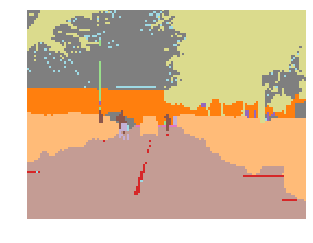

In [7]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [8]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([ 96, 128]), tensor([[[21, 21, 21,  ..., 26, 26, 26],
          [21, 21, 21,  ..., 26, 26, 26],
          [21, 26, 26,  ..., 26, 26, 26],
          ...,
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17]]]))

In [9]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

# Create dataset

In [10]:
data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=path)
        .normalize(imagenet_stats))

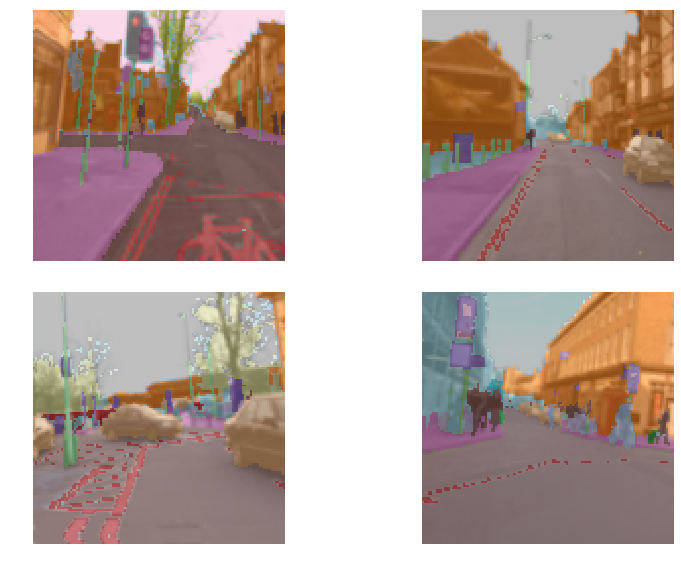

In [11]:
data.show_batch(rows=2, figsize=(12,8))

# Then we train a Unet for a few epochs.
### Unet with a resnet18 backbone

In [12]:
learn = unet_learner(data, models.resnet18)

In [13]:
learn.fit_one_cycle(3,1e-2)

epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

In [ ]:
#learn.save('unet')

# Show results

In [ ]:
learn.show_results()